In [ ]:
#https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb

# learning curev
# https://shankarmsy.github.io/stories/rf-sklearn.html

In [ ]:
df = pd.read_feather('dfv1')

In [ ]:
#process missing value, one hot cencode cat var
# X, y, nas = feature_engineering.proc_df(train, 'ordered' )

# Xtest, ytest, nas = feature_engineering.proc_df(test, 'ordered', na_dict=nas )

In [ ]:
# #Scaling features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df)
# df_norm = pd.DataFrame(scaler.transform(df), columns=df.columns)


In [ ]:
#Define Validation method
#Train and validation set split
from sklearn.model_selection import train_test_split
X = df.drop('target_var', axis=1)
y = df['column to predict']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, stratify = y.values, random_state = 101)
#Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)
#StratifiedKFold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=101)
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

In [ ]:
SEED = 666
In [29]:
x_int, x_test, y_int, y_test = train_test_split(x_normal, y, test_size=100, stratify=y, random_state = SEED)
In [30]:
x_train,x_val,y_train,y_val = train_test_split(x_int, y_int, test_size=100, stratify = y_int, random_state = SEED)
In [31]:
# print proportions
print('train: {}% | Validation: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_val)/len(y) ,2), 
                                                        round(len(y_test)/len(y),2) ) )
train: 0.85% | Validation: 0.08% | Test: 0.08%
5.2 Model Comparison
An Analytical comparison is performed initially, to assess which Models fare well in making accurate predictions. In doing so, several classification Techniques are compared. The model should perform better than a base model i.e., the one with 70% and above accuracy. Also, recall should be high because from a Business point of view 'False Negative's' i.e., Fraudulent transactions classified as Non-Fraudulent will be more costlier to the Bank.

 

In [ ]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('Ada', AdaBoostClassifier()))
models.append(('Grad', GradientBoostingClassifier()))

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=SEED)
    cv_results1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

In [ ]:

lr = LogisticRegression()

model = lr.fit(x_train, y_train)

model.score(x_val, y_val)

In [ ]:
# Fitting the model using the intermediate dataset.
model2 = lr.fit(x_int, y_int)

model2.score(x_test, y_test)
 

In [ ]:
# Predcited probability of each class.
y_pred_prob = model2.predict_proba(x_test)

# Predicted value of each class
y_pred = model2.predict(x_test)
 

In [ ]:
cMatrix = confusion_matrix(y_test, y_pred)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

### 5.4 Model Optimization
Models with the regularization of type 'l1' and 'l2' are Optimized using Grid-SearchCV.Several Hyper-parameters were taken into consideration. It is to be observed:

Model for type L1 performs better than L2.
False Classification Rate for the model in section 5.4.1 is lesser than the one in 5.4.2. Hence, We will use it as our Base model.

In [ ]:
LRPipeline1 = Pipeline([( 'LogReg', LogisticRegression(random_state=SEED)) ])

params = dict({ 'LogReg__penalty': ['l1'],'LogReg__C': [0.001,0.01,0.1,0.5,0.9,1,3,5,10], 'LogReg__tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'LogReg__solver': ['liblinear','saga']})

GSLR1 = GridSearchCV(LRPipeline1, params, cv=10, scoring='accuracy')
GSLR1.fit(x_train,y_train)

In [ ]:
GSLR1.score(x_val, y_val)

In [ ]:

# Model Accuracy on the Test Set

GSLR1.score(x_test, y_test)

In [ ]:
# Predcited probability of each class.
y_pred_prob1 = GSLR1.predict_proba(x_test)

# Predicted value of each class
y_pred1 = GSLR1.predict(x_test)
 

In [ ]:
cMatrix1 = confusion_matrix(y_test, y_pred1)
print(cMatrix1)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix1[0][1]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix1[1][0]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix1[1][1]/ sum(sum(cMatrix1))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix1[0][0]/ sum(sum(cMatrix1))*100 ))

### 5.4.2 'l2' Regularization

In [ ]:

LRPipeline2 = Pipeline([( 'LogReg', LogisticRegression(random_state=SEED)) ])

params = dict({'LogReg__max_iter':[100,200,300,400,500] ,'LogReg__penalty': ['l2'],'LogReg__C': [0.01,0.1,0.5,0.9,1,5,10], 'LogReg__tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'LogReg__solver': ['newton-cg','sag','lbfgs']})

GSLR2 = GridSearchCV(LRPipeline2, params, cv=10, scoring='accuracy')
 
GSLR2.fit(x_train,y_train)

In [ ]:
# Model Accuracy on the Test Set

GSLR2.score(x_test, y_test)
 
# Predcited probability of each class.
y_pred_prob2 = GSLR2.predict_proba(x_test)

# Predicted value of each class
y_pred2 = GSLR2.predict(x_test)
In [176]:
cMatrix2 = confusion_matrix(y_test, y_pred2)
print(cMatrix2)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix2[0][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix2[1][0]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix2[1][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix2[0][0]/ sum(sum(cMatrix2))*100 ))

### 5.5 Model Evaluation
We shall proceed with the model selected in section 5.4.1. The goal is to reduce the FALSE NEGATIVE count i.e., Fraudulent Transactions that are classified as Non-Fraudulent. This is so because classifying a Fraud transaction as Non-Fraud will be more cost inducuve to the Bank than classifying a Non-Fraud Transaction as Fraud.
In order to do so, we tweak the predicted probability of the test data and assign higher weightage to

In [ ]:
# Vaues taken from section 5.4.1
finalModel = LogisticRegression(penalty='l1', solver='liblinear', tol=0.1, C=5)
finalModel.fit(x_int, y_int)
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.1, verbose=0, warm_start=False)
scoreTrain = finalModel.score(x_val, y_val)
scoreTest = finalModel.score(x_test,y_test)

print("The Accuracy of the model on the Train Set is: %.1f " % (scoreTrain * 100))
print("The Accuracy of the model on the Test Set is: %.1f " % (scoreTest * 100))
The Accuracy of the model on the Train Set is: 72.0 
The Accuracy of the model on the Test Set is: 69.0 

In [ ]:
# Predcited probability of each class.
y_pred_prob_final = finalModel.predict_proba(x_test)

# Predicted value of each class
y_pred_final = finalModel.predict(x_test)

# Predicted Probability of class '0' i.e., not a Fraud Transaction.
y_zero = pd.Series(y_pred_prob_final[:,0])

# Mapping the predicted probability higher than 0.689 to class 0 i.e., Not-Fraud class.
y_pred_optimum = y_zero.map(lambda x: 0 if x>0.689 else 1)

cMatrix = confusion_matrix(y_test, y_pred_optimum)
print(cMatrix)
print("Transactions which were falsely classified as FRAUD =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were falsely classified as NOT-FRAUD = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as FRAUD = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Transactions which were truly classified as NOT-FRAUD = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

### 2nd way- square panda soln

In [654]:
### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, target)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

### Cross-validation with default parameters
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train_scaled, y_train)
print(scores.mean())

0.5919486004283298


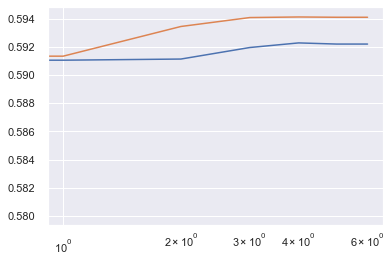

In [656]:
### do grid search

import numpy as np

param_grid = {'C': np.logspace(-3, 3, 7)}
param_grid

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid,
                    return_train_score=True)

grid.fit(X_train_scaled, y_train)

grid.best_params_
grid.best_score_

# some visualization

import pandas as pd
%matplotlib inline
res = pd.DataFrame(grid.cv_results_)
res.mean_test_score.plot()
res.mean_train_score.plot()
import matplotlib.pyplot as plt
plt.xscale("log")

grid.score(X_test, y_test)

important = np.argsort(np.abs(grid.best_estimator_.coef_)).ravel()



In [659]:
important

array([5, 1, 3, 2, 0, 4])

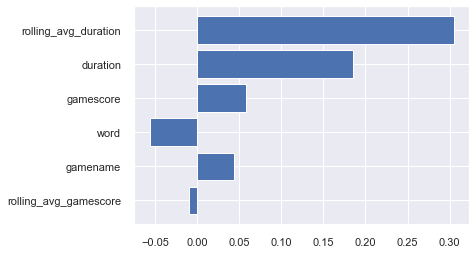

In [661]:
plt.barh(range(6), grid.best_estimator_.coef_.ravel()[important ])
plt.yticks(range(6), X_train.columns[important ]);

In [663]:
import lightgbm as lgb
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing, model_selection, metrics
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from scipy.sparse import hstack
from sklearn.metrics import log_loss, matthews_corrcoef, roc_auc_score, accuracy_score

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	training's auc: 0.67258	training's binary_logloss: 0.65719	valid_1's auc: 0.583099	valid_1's binary_logloss: 0.672425

 Fold 01 AUC: 0.583099 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	training's auc: 0.676099	training's binary_logloss: 0.656182	valid_1's auc: 0.597714	valid_1's binary_logloss: 0.670537

 Fold 02 AUC: 0.597714 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	training's auc: 0.672708	training's binary_logloss: 0.657	valid_1's auc: 0.610131	valid_1's binary_logloss: 0.669166

 Fold 03 AUC: 0.610131 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[89]	training's auc: 0.66709	training's binary_logloss: 0.657744	valid_1's auc: 0.628719	valid_1's binary_logloss: 0.665084

 Fold 04 AUC: 0.628719 

Training until

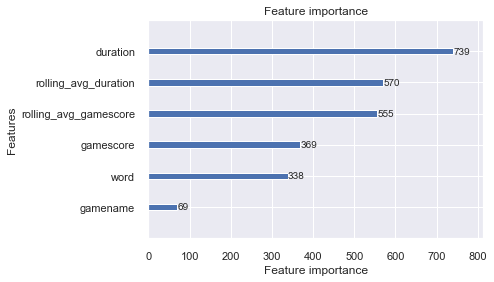

In [664]:


params = {"objective": "binary",
          "boosting_type": "gbdt",
#           "learning_rate": 0.1,
                  'learning_rate': 0.01,
        'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 10,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
#         'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 4,
          "metrics":['auc', 'binary']
          }

folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)
val_results = []
val_y = []


pred_test_full = 0


for i, (train_index, val_index) in enumerate(skf.split(X_train.values, y_train.values)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        dtrain = lgb.Dataset(X_train_fold, y_train_fold)
        dvalid = lgb.Dataset(X_val_fold, y_val_fold, reference=dtrain)
        bst = lgb.train(params, dtrain, 10000, valid_sets=(dtrain, dvalid), verbose_eval=500,
                        early_stopping_rounds=100)
        
        
        val_results.extend(bst.predict(X_val_fold.values))
        val_y.extend(y_val_fold.values)
        
        
        lr_y_val_pred = bst.predict(X_val_fold)
        
        pred_test_full += bst.predict(X_test.values)
        
        
        
        fold_score = roc_auc_score(y_val_fold, lr_y_val_pred)
        print('\n Fold %02d AUC: %.6f \n' % ((i+1), fold_score))


pred_test_full /= 5.        


ax = lgb.plot_importance(bst, max_num_features=20)
plt.show()

